## Goal
To develop further capability with numerical methods for integration.

We will also have a brief introduction to the idea of numerical
approximation of derivatives, as preparation for thinking about
ordinary and partial differential equations.

## Readings
Let us list all the sections we are covering in Newman Chapter 5 **Integrals and derivatives**, including those we read last week:

    5.1 Fundamental methods for evaluating integrals

    5.2 Errors on integrals

    5.3 Choosing the number of steps

    5.4 Romberg integration*

    5.5 Higher-order integration methods

    5.7 Choosing an integration method

    5.8 Integrals over infinite ranges*

    5.10 Derivatives* -- Just read subsections 5.10.1-5.10.3 for the basics.

\* New reading this week.


In [2]:
#For colored cells, currently blue cells, black text 
#https://stackoverflow.com/questions/18024769/adding-custom-styled-paragraphs-in-markdown-cells
from IPython.core.display import HTML
def css_styling():
    styles = open("style.css", "r").read()
    return HTML(styles)
css_styling()

<div class=answer>
*This should be a blue cell with black font if you set the filepath correctly*</font>
<div/>

## Overview

There are two aspects to this week's investigations:

1.  The first is more technically oriented - we will reorient our thinking towards calculating results to a  given *tolerance*, rather than with a fixed number of steps.  We will then explore the idea of extrapolating to a more accurate answer - Romberg integration is an example of the more general approach of Richardson extrapolation, which is also applied in other contexts (in particular, solution of differential equations).

2. The second aspect is oriented towards developing savvy in the use of numerical integration.  We will develop a feel for some of the less well-behaved types of integrals which one encounters in practice, and see ways of handling integrals over infinite ranges.

This week you may use your own integration technique, or ```integrate.py``` to do this.  See some directions below the answer box for importing ```integrate.py```.  To use it, look at your work from last week, or call ```help(integrate)```.  To import the module, either you need a local copy of ```integrate.py``` in which case you can run:  

In [3]:
import integrate
import math

# benchmark function - as last week
def f_decay(x):
    return math.exp(-x)
int_decay = 1 - 1/math.e

# sample quick checks
#print(integrate.integrate(f_decay,(0,1),100)[0])           #trapezoid, 100 steps
#print(integrate.integrate(f_decay,(0,1),1000)[0])          #trapezoid, 100 steps
#print(integrate.integrate(f_decay,(0,1),100,order=2)[0])   #simpsons, 1000 steps

Or alternatively you can use the ```sys``` module (short for system) to update the filepaths that python will look for modules in.  The code for that is:  

In [4]:
import sys
sys.path.append("/Users/mcde2235/Box Sync/Coursework/PHY325/Spring2018/Labs/Lab4")
import integrate



**FYI: if you modify your module, you will need to restart the kernel to use the modified codes.  There are some alternative methods, but nothing elegant
[source](https://support.enthought.com/hc/en-us/articles/204469240-Jupyter-IPython-After-editing-a-module-changes-are-not-effective-without-kernel-restart).**

In [5]:
bVerbose = True

## Exercise 1: 

In Section 5.2.1, Newman describes the practical method for estimating the error in a trapezoidal rule or Simpson's rule calculation.  Try these error estimates out for the trapezoidal rule on our benchmark integral, with $20$ steps
and $200$ steps.  __How close are the estimates to the actual errors?__  What about the sign (this will matter when we get to Romberg integration)? Repeat for Simpson's rule.

In [6]:
import math
import numpy as np
import integrate

def negExp (x):
    """Returns e^(-x) of some value x
    
    arguement: x
    
    returned: e^(-x)"""
    
    return math.exp (-x)

a = 0
b = 1

def negExpDerivFirst (xValue):
    """Returns the first derivative of the function f(x) = e^(-x) for some x
    
    arguement: x
    
    returend: d/dx(e^(-x))"""
    
    return -negExp (xValue)

def negExpDerivThird (xValue):
    """Returns the third derivative of the function f(x) = e^(-x) for some x
    
    arguement: x
    
    returend: d^3/d^3x(e^(-x))"""
    
    return negExpDerivFirst (xValue)

def unsignedError (acceptedValue, actualValue):
    """Returns the signed error given an accepted value and an actual value
    
    arguements: accepted value, actual value
    
    returned: the difference between the two arguements"""
    
    return acceptedValue - actualValue

def eulerErrorTrapezoidal (x1, x2, h, derivFunc):
    """Returns the Euler leading error of a trapezoidal approximation with the given derivative
    
    arguments: x1 - first x-value in domain
               x2 - second x-value in domain
               h - step size for integration
               derivFunc - the derivative of the function
               
    returned: the euler leading error
    """
    
    return 1 / 12 * h**2 * (derivFunc (a) - derivFunc (b))
    
def eulerErrorSimpsons (x1, x2, h, derivFunc):
    """Returns the Euler leading error of a Simpson's approximation with the given derivative
    
    arguments: x1 - first x-value in domain
               x2 - second x-value in domain
               h - step size for integration
               derivFunc - the derivative of the function
               
    returned: the euler leading error
    """
    
    return 1 / 90 * h**4 * (derivFunc (a) - derivFunc(b))
    
acceptedValue = -np.exp (-1) + 1

#trapezoidal Euler-Maclaurin formula
N = 20
h = (a - b) / N

trapEps = 1 / 12 * h**2 * (negExpDerivFirst (a) - negExpDerivFirst (b))
integralValue, integralXValues, integrandValues = integrate.integrate (negExp, (a, b), N, order = 1, \
                                                                       float_type = np.float64)
trapEpsActual = unsignedError (acceptedValue, integralValue) 
print ("Trapezoidal N =", N)
print ("Euler-Maclaurin:", trapEps)
print ("Actual:", trapEpsActual)
print ("residual/error:", trapEpsActual / trapEps)
print ()

N = 200
h = (a - b) / N

trapEps = 1 / 12 * h**2 * (negExpDerivFirst (a) - negExpDerivFirst (b))
integralValue, integralXValues, integrandValues = integrate.integrate (negExp, (a, b), N, order = 1, \
                                                                       float_type = np.float64)
trapEpsActual = unsignedError (acceptedValue, integralValue) 
print ("Trapezoidal N =", N)
print ("Euler-Maclaurin:", trapEps)
print ("Actual:", trapEpsActual)
print ("residual/error:", trapEpsActual / trapEps)
print ()

#simpson Euler-Maclaurin formula
N = 20
h = (a - b) / N

simpEps = 1 / 90 * (h**4) * (negExpDerivThird (a) - negExpDerivThird (b))
integralValue, integralXValues, integrandValues = integrate.integrate (negExp, (a, b), N, order = 2, \
                                                                       float_type = np.float64)
simpEpsActual = unsignedError (acceptedValue, integralValue)
print ("Simpson N =", N)
print ("Euler-Maclaurin:", simpEps)
print ("Actual:", simpEpsActual)
print ("residual/error:", simpEpsActual / simpEps)
print ()

N = 200
h = (a - b) / N

simpEps = 1 / 90 * (h**4) * (negExpDerivThird (a) - negExpDerivThird (b))
integralValue, integralXValues, integrandValues = integrate.integrate (negExp, (a, b), N, order = 2, \
                                                                       float_type = np.float64)
simpEpsActual = unsignedError (acceptedValue, integralValue)
print ("Simpson N =", N)
print ("Euler-Maclaurin:", simpEps)
print ("Actual:", simpEpsActual)
print ("residual/error:", simpEpsActual / simpEps)
print ()

Trapezoidal N = 20
Euler-Maclaurin: -0.00013169178308928287
Actual: -0.000131686296258
residual/error: 0.999958335814

Trapezoidal N = 200
Euler-Maclaurin: -1.3169178308928286e-06
Actual: -1.31691728245e-06
residual/error: 0.999999583537

Simpson N = 20
Euler-Maclaurin: -4.3897261029760966e-08
Actual: -2.19420999148e-08
residual/error: 0.499851229896

Simpson N = 200
Euler-Maclaurin: -4.3897261029760956e-12
Actual: -2.19468887508e-12
residual/error: 0.499960321805



## Exercise 2
### Trapezoidal rule with tolerance goal (Newman's Adaptive Method)

In practice, integration with a fixed  number of *steps* is not useful for automated use.  If your code must calculate millions of integrals (or even just hundreds of integrals), and you need a certain accuracy, it is simply impractical for you to intervene and hand-pick the number of steps for each integral.  You could just choose a "really big'' number of steps for all integrals, even when they are not needed, but this will make your code impractically slow (perhaps factors of hundreds slower than it needs to be).

Following the approach outlined in Newman Section 5.3, let us write a function which uses the trapezoidal rule to calculate with $1$, $2$, $4$, $8$, $\ldots$ steps (*i.e.*, $~2^i$ steps), until the error estimate falls below a specified tolerance.  

As Newman points out, we do not need to calculate all the points from scratch in each successive iteration.  Your
function should follow's Newman's approach, *i.e.*, "reusing'' the value of the previous integral to avoid evaluating the integrand $f$ at the same point more than once.

In fact, let us see how how much of an improvement this gives. Suppose we ultimately need, say, $2^{5}$ steps.  How many times would we have to evaluate $f$ if we evaluated the integral from scratch with each iteration ($1$, $2$, $4$, $8$, $\ldots$ steps)?  How many times would we have to evaluate $f$ if we reused the prior integrals, instead?

<div class=answer>
<div/>
If we evaluated the integral from from scratch, we would have to calcualte 63 total trapezoids. If we use Newman's method, we could have to calculate, 32 trapezoids.

Also, it will help if your function can produce verbose output, showing the integral and error estimate at each stage, and the residual relative to a known true value (you can peek at ```romberg.py``` for ideas on how to do this).

You can name your function ```integrate_adaptive```, and either embed it in this notebook in a code cell (as usual) or add it to the ```integrate.py``` which I gave you last week.   

In [76]:
def eulerError (x1, x2, h, derivFunc):
    """Returns the Euler leading error of a trapezoidal approximation with the given derivative
    
    arguments: x1 - first x-value in domain
               x2 - second x-value in domain
               h - step size for integration
               derivFunc - the derivative of the function
               
    returned: the euler leading error
    """
    
    return 1 / 12 * h**2 * (derivFunc (x1) - derivFunc (x2))

def error(actual, calculated):
    """Returns the unsigned error given an accepted value and an actual value
    
    arguements: accepted value, actual value
    
    returned: the absolute value of the difference between the two arguements"""
    
    err = abs(actual - calculated)
    return err

def integrate_adaptive (func, funcDeriv, epsilon, x1, x2, bVerbose = False, maxN = -1):
    """Calculates the integral of a given function only to a specified accuracy
    
    arguements: func - the function being integrated
                derivFunc - first derivative of the given function
                epsilon - the desired accuracy
                x1 and x2 - the bounds
                accpeted - the accepted value of the integral
                bVerbose - whether the function prints out all of the data
                maxN - max number of iterations for approximation, negative for infinite possible iterations
                
    returned:   I_new - the value of the integral
                iterations - the number of times the integral was calculated"""
    
    iterations = 0
    N = 1
    I_old = 0
    h = (x2 - x1)/N
    I_new = h * (0.5 * func(x1) - 0.5 * func(x2))
    errorValue = abs(eulerError (x1,  x2, h, funcDeriv))
    # Calculates the integral with increasing accuracy until the desired accuracy is reached, or N > 1000
    while errorValue > epsilon and (N < maxN or maxN < 0):
        iterations += 1
        I_old = I_new
        N *= 2
        h /= 2
        # "Updates" the new integral from the old
        I_new = 0.5 * I_old
        errorValue = abs(eulerError (x1,  x2, h, funcDeriv))
        
        for i in range(1,N-1,2):
            I_new += h * func(x1 + i * h)
        if bVerbose:
            string = "I({}) = {} Error: {}".format (iterations, I_new, errorValue)
            print (string)
            
        
    return I_new, iterations

Test your new function out on the same benchmark integral
$$
\int_0^1 e^{-x}\,dx
$$
as last week, and see how many iterations $i$ (and thus steps $2^i$) are
required to achieve a tolerance of $10^{-10}$.

In [60]:
a = 0
b = 1
actualVal = -np.exp (-1) + 1
IFinal = integrate_adaptive (negExp, negExpDerivFirst, 1e-10, a, b, bVerbose=True)
print(IFinal)
print (actualVal)

I(1) = 0.15803013970713942 Error: 0.013169178308928284
I(2) = 0.2737152656214209 Error: 0.003292294577232071
I(3) = 0.3999885840475302 Error: 0.0008230736443080178
I(4) = 0.4913735450957247 Error: 0.00020576841107700444
I(5) = 0.5498344535889635 Error: 5.144210276925111e-05
I(6) = 0.5851260101211467 Error: 1.2860525692312777e-05
I(7) = 0.6057234697148481 Error: 3.2151314230781944e-06
I(8) = 0.6174785570504572 Error: 8.037828557695486e-07
I(9) = 0.6240794377402961 Error: 2.0094571394238715e-07
I(10) = 0.6277403397726977 Error: 5.023642848559679e-08
I(11) = 0.6297507203774259 Error: 1.2559107121399197e-08
I(12) = 0.6308458002165225 Error: 3.139776780349799e-09
I(13) = 0.6314382660970846 Error: 7.849441950874498e-10
I(14) = 0.6317569573169127 Error: 1.9623604877186245e-10
I(15) = 0.6319275308914695 Error: 4.905901219296561e-11
(0.6319275308914695, 15)
0.632120558829


<div class=answer>
<div/>
  
15 iterations

## Exercise 3
### Romberg integration

In the interest of time, I have gone ahead and provided you with code for Romberg integration in ```romberg.py```.  It is basically just a straightforward extension of what you just coded for the trapezoidal rule.  (That is, as with most code, it is straightforward in *retrospect*, once it is written...)

First, try the function ```romberg.romberg``` on our benchmark integral.  Enable the verbose output (```verbose=True```), and provide the function with the true value (```reference=...```) so it can print the residual.  Let us try for a tolerance of $10^{-10}$ again.

In [9]:
import romberg

a = 0
b = 1

I_romberg = romberg.romberg(negExp,(a,b), 1e-10, verbose = True)

integrating on range (0, 1)

R(0,0) +6.839397205857212e-01

R(1,0) +6.452351901491773e-01 epsilon(1,0) -1.2902e-02
R(1,1) +6.323336800036626e-01

R(2,0) +6.354094290276936e-01 epsilon(2,0) -3.2753e-03
R(2,1) +6.321341753205323e-01 epsilon(2,1) -1.3300e-05
R(2,2) +6.321208750083236e-01

R(3,0) +6.329434182104802e-01 epsilon(3,0) -8.2200e-04
R(3,1) +6.321214146047424e-01 epsilon(3,1) -8.5071e-07
R(3,2) +6.321205638903564e-01 epsilon(3,2) -4.9384e-09
R(3,3) +6.321205589519759e-01

R(4,0) +6.323263138444998e-01 epsilon(4,0) -2.0570e-04
R(4,1) +6.321206123891729e-01 epsilon(4,1) -5.3481e-08
R(4,2) +6.321205589081349e-01 epsilon(4,2) -7.9083e-11
R(4,3) +6.321205588290520e-01 epsilon(4,3) -4.8205e-13
R(4,4) +6.321205588285700e-01



How does the number of steps (and thus the number of points at which the integrand must be evaluated) compare to the number you needed before, with the trapezoidal rule?

<div class=answer>
<div/>
The number of steps that needs to be evaluated is 31. About the same as that of Newman's trapezoid rule method.

Here is an interesting observation, which I think might make Romberg extrapolation fit in better with what we have already seen.  We now seem to have two ways of going to higher order - the good old-fashioned way of using higher-order polynomials to go through the points (Newton-Cotes) or this new clever Romberg extrapolation way.
You might have noticed that:
1. the trapezoidal rule had an error of order $O(h^2)$, 

2. Simpson's rule  had an error of order $O(h^4)$, and now 

3. the first Romberg extrapolated value $R_{i,1}$ also has an error of order $O(h^4)$

    **Caution:** I am following the $0$-based convention that $R_{i,0}$ is the trapezoidal rule value, $R_{i,1}$ is the first extrapolation, *etc.*  Note that Newman uses $1$-based numbering, starting with $R_{i,1}$ for the trapezoidal rule, *etc.*, instead.

Might the first Romberg extrapolated value actually *be* Simpson'a rule???  Or does it just have an error which happens to be of the same order?  

More concretely...  Go ahead and do Simpson's rule calculations with $2^i$ steps, and compare with the first extrapolated values in the Romberg method.  Are they the same or different?  

In [10]:
for i in [1,2,3,4]:
    N = 2**i
    I_simpson = integrate.integrate (negExp, (a, b), N, order = 2)[0]
    print("Order", i, ": ", I_simpson)

Order 1 :  0.6323336800036626
Order 2 :  0.6321341753205323
Order 3 :  0.6321214146047422
Order 4 :  0.6321206123891728


<div class=answer>
<div/>
The values given by Simpson's rule match up exactly with those given by Romberg integration

Explain your result in terms of the
formulas for Simpson's rule, the trapezoidal rule, and Romberg
extrapolation.

<div class=answer>
<div/>
Simpson's rule is calcualted by (1/3) * h multipled by the sum of the f(x) values at each slice, where odd slices are multiplied by 4, even slices are multipled by 2, and the end poitns are multipled by 1. Romberg integration starts with the trapezoid rule formula, so the endpoints are multipled by (1/2), but when the next term is calcualted this factor gets transformed to (1/3). Also, since with each calculation, we subtract Ii-1, the odd slices will have double the weight of the even slices. This makes Rhomberg integration equivalent to Simpson's rule.

## Exercise 4
### Life gets messy

** Note:** You may find your output in this section to be too much information.  You do not need to print out the entirety of the verbose output for all these
calculations.  

Now that we are equipped with all these ultrapowerful integration
algorithms, we should be ready to face any problem which is thrown at
us, right???  So calculating the area of a circle should be a piece of
cake, right?

*Ha! Since when has ```pi``` been cake?*

Plot the graph of the function $f(x)=\sqrt{1-x^2}$ on $[-1,1]$.

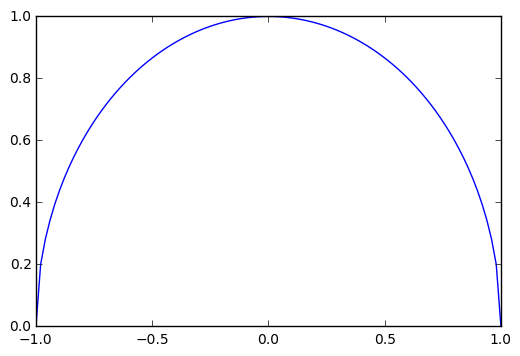

In [57]:
%matplotlib inline
import pylab as plt
from math import sqrt, pi

def circleFunc (x):

    return sqrt(1 - x**2)

def circleFuncDeriv (x):
    if x == 1 or x == -1:
        deriv = 0
    else: 
        deriv = - x / sqrt(1 - x**2)
    return deriv

length = 100
x = np.linspace (-1,1,length)
y = []

for n in range(0,length):
    y.append(circleFunc (x[n]))
   
plt.plot(x,y)
plt.show()

What is the analytically known value of the integral
$$
\int_{-1}^{1}\sqrt{1-x^2}\,dx?
$$
**Note:** You may quote results from elementary school without further proof.

<div class=answer>
<div/>
(1/2)pi x^2

To reach a tolerence of $10^{-10}$ with the trapezoidal rule, how many
iterations (and thus steps) are required?  Do you find that the
residual of your 
calculated result, relative to the known true value, is consistent with the
tolerance you asked for?  How about with Romberg extrapolation?

In [61]:
a = -1
b = 1
actualVal = (1/2) * pi

ICircle1 = integrate_adaptive (circleFunc, circleFuncDeriv, 1e-10, -1, 1, bVerbose=True)

print(ICircle1)
print (actualVal)
print ()

ICircle2 = romberg.romberg(circleFunc,(a,b), 1e-10, verbose = True)

print(actualVal)



(0.0, 0)
1.5707963267948966

integrating on range (-1, 1)

R(0,0) +0.000000000000000e+00

R(1,0) +1.000000000000000e+00 epsilon(1,0) +3.3333e-01
R(1,1) +1.333333333333333e+00

R(2,0) +1.366025403784439e+00 epsilon(2,0) +1.2201e-01
R(2,1) +1.488033871712585e+00 epsilon(2,1) +1.0313e-02
R(2,2) +1.498347240937868e+00

R(3,0) +1.497854534051220e+00 epsilon(3,0) +4.3943e-02
R(3,1) +1.541797577473481e+00 epsilon(3,1) +3.5842e-03
R(3,2) +1.545381824524207e+00 epsilon(3,2) +7.4658e-04
R(3,3) +1.546128405216054e+00

R(4,0) +1.544909572178587e+00 epsilon(4,0) +1.5685e-02
R(4,1) +1.560594584887709e+00 epsilon(4,1) +1.2531e-03
R(4,2) +1.561847718715324e+00 epsilon(4,2) +2.6136e-04
R(4,3) +1.562109082115183e+00 epsilon(4,3) +6.2669e-05
R(4,4) +1.562171751436356e+00

R(5,0) +1.561626518913870e+00 epsilon(5,0) +5.5723e-03
R(5,1) +1.567198834492298e+00 epsilon(5,1) +4.4028e-04
R(5,2) +1.567639117799270e+00 epsilon(5,2) +9.1927e-05
R(5,3) +1.567731044768857e+00 epsilon(5,3) +2.2047e-05
R(5,4) +1.567753

<div class=answer>
<div/>
Using the integrate_adaptive function, only one iteration is run, because the calculated error is equal to 0 right from the beginning. However, the actual value is not at all accurate. Using Romberg integration, 67 iterations are used, and the error is consistant with our tolerance.

Looking back at the
Euler-Maclaurin formula, why might we expect this integral to be
problematic?

**Comment:**  Our whole analysis is based on the idea that the error in the trapezoidal rule is $O(h^2)$.  But occasionally the coefficient on $h^2$ can be important...


<div class=answer>
<div/>
The integral is problematic, becuase f'(a) = f'(b), so the error calcualted will alwyas be zero because f'(a) - f'(b) is a factor.

There is a further lesson to be learned here.   Sometimes just throwing numerical methods at a problem is not enough.  A little forethought can allow us to
transform the problem into one which is more amenable to numerical solution.  Try
making the trigonometric substitution $x=\cos u$.

You should have just found that the integral an equivalent to
$\int_0^\pi \sin^2 u\,du$.  Do we still expect trouble?  (Explain.)  

<div class=answer>
<div/>
We still expect trouble, because d/dx sin^2(u) = 2sin(u)cos(u) which is equal at points 0 and pi.

How does this transformed integral fare with the Romberg method?

In [63]:
from math import sin

def sinFunc (x):
    return sin(x)**2

a = 0
b = pi

ICircle3 = romberg.romberg(sinFunc,(a,b), 1e-10, verbose = True)

print(actualVal)

integrating on range (0, 3.141592653589793)

R(0,0) +2.355817157679958e-32

R(1,0) +1.570796326794897e+00 epsilon(1,0) +5.2360e-01
R(1,1) +2.094395102393195e+00

R(2,0) +1.570796326794897e+00 epsilon(2,0) +0.0000e+00
R(2,1) +1.570796326794897e+00 epsilon(2,1) -3.4907e-02
R(2,2) +1.535889741755010e+00

R(3,0) +1.570796326794897e+00 epsilon(3,0) +7.4015e-17
R(3,1) +1.570796326794897e+00 epsilon(3,1) +1.4803e-17
R(3,2) +1.570796326794897e+00 epsilon(3,2) +5.5407e-04
R(3,3) +1.571350399573308e+00

R(4,0) +1.570796326794897e+00 epsilon(4,0) +0.0000e+00
R(4,1) +1.570796326794897e+00 epsilon(4,1) +0.0000e+00
R(4,2) +1.570796326794897e+00 epsilon(4,2) -7.0490e-18
R(4,3) +1.570796326794897e+00 epsilon(4,3) -2.1728e-06
R(4,4) +1.570794153960472e+00

R(5,0) +1.570796326794897e+00 epsilon(5,0) +0.0000e+00
R(5,1) +1.570796326794897e+00 epsilon(5,1) +0.0000e+00
R(5,2) +1.570796326794897e+00 epsilon(5,2) +0.0000e+00
R(5,3) +1.570796326794897e+00 epsilon(5,3) +0.0000e+00
R(5,4) +1.570796326794897e+00 

<div class=answer>
<div/>
It works well

## Exercise 5
### Life continues to be messy: Oscillatory integrands

One perpetual bane of physicists' existence is highly oscillator
integrands.  

Let us look at the integral
$$
\int_0^{2\pi} e^x \sin 100x \,dx.
$$
First, plot the integrand.  Comment on why it might be problematic.
Can you speculate on how many slices might be needed for successful evaluation?

In [74]:
import math

def funkyFunc (x):
    return math.exp (x) * math.sin (100 * x)

def funkyFuncDeriv (x):
    return 100 * math.exp (x) * math.cos (100 * x) + math.exp (x) * sin (100 * x) 

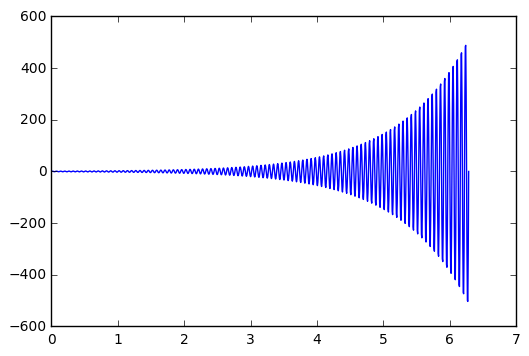

In [71]:
%matplotlib inline
import pylab as plt
x1 = 0
x2 = 2 * math.pi
length = 1000

x = np.linspace (x1, x2, length)
y = []

for n in range(0,length):
    y.append(funkyFunc (x[n]))
   
plt.plot(x,y)
plt.show()

<div class=answer>
<div/>
This might be problamatic because there are small slices (width wise) that exponential increase in value. It will be tricky to have our trapezoids fit inside the function!

Then, see how Romberg fares on this integral.  Comment.

In [77]:
a = 0
b = 2 * pi

integralFunkyFuncAdap = integrate_adaptive (funkyFunc, funkyFuncDeriv, 1e-10, a, b, bVerbose=False)

integralFunkyFunc = romberg.romberg(funkyFunc, (a,b), 1e-10, verbose = True)

print (integralFunkyFunc)
print (integralFunkyFuncAdap)

I(1) = -3.304681206705777e-12 Error: 43960.17663093961
I(2) = -1.6449188750999148e-12 Error: 10990.044157734903
I(3) = 8.837880368676713e-13 Error: 2747.5110394337257
I(4) = 44.648174055812866 Error: 686.8777598584314
I(5) = 13.253460253736215 Error: 171.71943996460786
I(6) = 53.0135061879742 Error: 42.929859991151964
I(7) = 15.318931759548509 Error: 10.732464997787991
I(8) = 5.468130442607874 Error: 2.683116249446998
I(9) = 5.363044198189389 Error: 0.6707790623617494
I(10) = 1.7143489195255754 Error: 0.16769476559043736
I(11) = -1.3627691278143452 Error: 0.04192369139760934
I(12) = -3.238764978236421 Error: 0.010480922849402335
I(13) = -4.262748986631143 Error: 0.0026202307123505838
I(14) = -4.79635027198579 Error: 0.0006550576780876459
I(15) = -5.068561614313789 Error: 0.00016376441952191149
I(16) = -5.206020649509321 Error: 4.094110488047787e-05
I(17) = -5.275088571836883 Error: 1.0235276220119468e-05
I(18) = -5.309707140746739 Error: 2.558819055029867e-06
I(19) = -5.327037577870914

<div class=answer>
<div/>
The Romberg method does not fair very well. The value supplied by the Romberg's approximation was far off from the accepted value (which is close to the value obtained by our adaptive method).

Now try the integral
$$
\int_0^{2\pi} e^x \sin 128x \,dx.
$$
See how Romberg fares on this integral, and comment on why.
Please attach your plot of the integrand.

In [80]:
def funkiestFunc (x):
    return math.exp (x) * math.sin (128 * x)

def funkiestFuncDeriv (x):
    return 128 * math.exp (x) * math.cos (128 * x) + math.exp (x) * sin (128 * x) 

In [81]:
a = 0
b = 2 * pi

integralFunkiestFuncAdap = integrate_adaptive (funkiestFunc, funkiestFuncDeriv, 1e-10, a, b, bVerbose=False)

integralFunkiestFunc = romberg.romberg(funkiestFunc, (a,b), 1e-10, verbose = True)

print (integralFunkiestFunc)
print (integralFunkiestFuncAdap)

integrating on range (0, 6.283185307179586)

R(0,0) -5.274161174863635e-11

R(1,0) -2.751039172392076e-11 epsilon(1,0) +8.4104e-12
R(1,1) -1.909998504901557e-11

-1.909998504901557e-11
(-4.175337725791389, 26)


<div class=answer>
<div/>
Romberg's function does not work very well for this function as well. The value provided by the Romberg's approximation is significantly less than the accepted value.

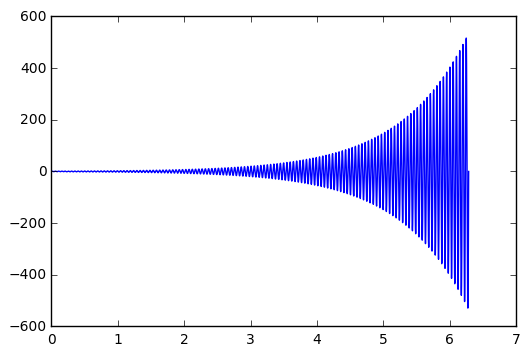

In [87]:
%matplotlib inline
import pylab as plt

x1 = 0
x2 = 2 * math.pi
length = 100000

x = np.linspace (x1, x2, length)
y = []

for n in range(0,length):
    y.append(funkiestFunc (x[n]))
   
plt.plot(x,y)
plt.show()

## Exercise 6
### Integrals over infinite ranges

Let us start by reproducing Newmans's Example 5.3 (on page 180).  But please ignore Newman's code for Gaussian integration.  Instead, we will continue to use our own Romberg integration function.

Integrands which involve the Gaussian $e^{-x^2}$ show up throughout
physics.  The basic Gaussian integral has a simple known value, so we
will use it as our test case (as we used last week ):
$$
\int_{-\infty}^\infty e^{-x^2}\,dx=\sqrt{\pi}.
$$

The integrand is symmetric, so we are free to consider just one half
($\int_{0}^\infty e^{-x^2}\,dx$), as Newman uses for his example, then
double the result.  Let us transform this integral according
to (5.67), to make sure we see how Newman got his expression.

**Sorry about the
overloading of Gauss's name. A "Gaussian integral" is an integral of
the Gaussian function.  "Gaussian integration" is integration by Gaussian
quadrature.  The two are not particularly related.**

<div class=answer>
<div/>
Answer here

Now try to evaluate the transformed integral using the Romberg
method.  What problem do you encounter, and how can you fix it?
It will help to make a plot of the integrand.

**Hint:** From looking at the plot,  what is the integrand's limit as $z\rightarrow 1$?


In [18]:
#your code here

<div class=answer>
<div/>
Answer here

Finally, how does the Romberg method fare on the integral? Explain.

In [19]:
#your code here

<div class=answer>
<div/>
Answer here

Plot your transformed integrand.

In [20]:
#your code here

## Numerical differentiation

** Newman Exercise 5.15 **

Create a user-defined function ```f(x)``` that returns the value $1 + \frac{1}{2} \tanh(2x)$, then use a central difference to calculate the derivative of the function in the range $-2\le x\le2$.  Calculate an analytic formula for the derivative and make a graph with your numerical result and the analytic answer on the same plot.  It may help to plot the exact answer as lines and the numerical one as dots.  

**Hint:** In Python the ```tanh``` function is found in the ```math``` package, and it's called simply ```tanh```.

Please attach your code and plots.


In [21]:
#your code here